In [3]:
import pandas as pd
inputData = pd.read_csv('train.csv')
inputData.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
inputData.mean()

label       4.456643
pixel0      0.000000
pixel1      0.000000
pixel2      0.000000
pixel3      0.000000
              ...   
pixel779    0.002857
pixel780    0.000000
pixel781    0.000000
pixel782    0.000000
pixel783    0.000000
Length: 785, dtype: float64

In [5]:
inputData.describe().iloc[1]

label       4.456643
pixel0      0.000000
pixel1      0.000000
pixel2      0.000000
pixel3      0.000000
              ...   
pixel779    0.002857
pixel780    0.000000
pixel781    0.000000
pixel782    0.000000
pixel783    0.000000
Name: mean, Length: 785, dtype: float64

In [6]:
count_zero_list = 0
count_not_zero_list = 0
for i in inputData.columns:
    if inputData[i].mean() == 0:
        count_zero_list += 1
    else:
        count_not_zero_list += 1
print(count_zero_list, count_not_zero_list)

76 709


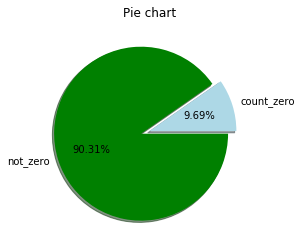

In [15]:
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
labels=['count_zero','not_zero']
X=[count_zero_list,count_not_zero_list-1]  
colors=['lightblue','green']
explode=(0,0.1)


fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%',colors=colors,explode=explode,shadow=True)
plt.title("Pie chart")
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split

train_label = inputData['label']
train_data = inputData.iloc[:,2:]
X_train,X_test,y_train,y_test=train_test_split(train_data,train_label,test_size=0.1)
clf = RandomForestClassifier(n_estimators=1000,min_samples_split=5)
clf = clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))

submission_Data = pd.read_csv('test.csv')
submission_X = submission_Data.iloc[:,1:]
res = clf.predict(submission_X)

0.9998677248677249


In [28]:
res

array([2, 0, 9, ..., 3, 9, 2])

In [45]:
index_list = range(1, len(res) + 1)
dataframe = pd.concat([pd.DataFrame(index_list).astype(int),pd.DataFrame(res)],axis=1)
dataframe.columns = ['ImageId','Label']
pd.DataFrame(dataframe).to_csv('res.csv', index=False)
dataframe

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
